# 비트코인 가격 분석

## #01. 준비작업

### [1] 패키지 참조

`pyupbit` 패키지의 설치가 필요하다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

import datetime as dt
import pyupbit

### [2] 데이터 수집

pyupbit 패키지 사용 

#### (1) 조회 가능한 단위 목록 확인

- `KRW` : 한국화폐
- `BTC` : Bitcoin
- `ETH` : 이더리움

In [2]:
print(pyupbit.get_tickers())

['KRW-BTC', 'KRW-ETH', 'BTC-ETH', 'BTC-XRP', 'BTC-ETC', 'BTC-CVC', 'BTC-DGB', 'BTC-SC', 'BTC-SNT', 'BTC-WAVES', 'BTC-NMR', 'BTC-XEM', 'BTC-QTUM', 'BTC-BAT', 'BTC-LSK', 'BTC-STEEM', 'BTC-DOGE', 'BTC-BNT', 'BTC-XLM', 'BTC-ARDR', 'BTC-ARK', 'BTC-STORJ', 'BTC-GRS', 'BTC-RLC', 'USDT-BTC', 'USDT-ETH', 'USDT-XRP', 'USDT-ETC', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'BTC-ADA', 'BTC-MANA', 'KRW-SBD', 'BTC-SBD', 'KRW-POWR', 'BTC-POWR', 'KRW-BTG', 'USDT-ADA', 'BTC-DNT', 'BTC-ZRX', 'BTC-TRX', 'BTC-TUSD', 'BTC-LRC', 'KRW-ICX', 'KRW-EOS', 'USDT-TUSD', 'KRW-TRX', 'BTC-POLYX', 'USDT-SC', 'USDT-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'BTC-BCH', 'USDT-BCH', 'KRW-BCH', 'BTC-HIFI', 'BTC-LOOM', 'KRW-BAT', 'KRW-IOST', 'USDT-DGB', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'BTC-RVN', 'BTC-GO', 'BTC-UPP', 'BTC-ENJ', 'KRW-HIFI', 'KRW-ONG', 'KRW-

#### (2) 특정 단어를 포함하는 조회 가능 목록만 가져오기

In [3]:
print(pyupbit.get_tickers(fiat='KRW'))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PDA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-META', 'KRW-FCT2', 'KRW-CBK', 'KRW-SAND', 'KRW-HPO', 'KRW-D

#### (3) 현재 시세 가져오기

조회하고자 하는 단위의 이름을 리스트로 설정한다.

In [4]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])

{'KRW-BTC': 104660000.0, 'KRW-ETH': 5676000.0}

#### (4) 특정 기간에 대한 시세 데이터 가져오기

비트코인의 한국 화폐단위(`KRW-BTC`) 데이터를 오늘 날짜부터 500일간 일단위(`day`)로 조회

조회간격 단위: `minute1`, `minute3`, `minute5`, `minute10`, `minute15`, `minute30`, `minute60`, `minute240`, `day`, `week`, `month`

| 필드 | 설명 |
|---|---|
| open | 시가 |
| high | 고가 |
| low | 저가 |
| close | 종가 |
| volume | 거래량 |
| value | 거래량을 지정된 화폐 단위로 환산한 가치 |

In [5]:
ticker = 'KRW-BTC'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
interval = 'day'
origin = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
my_pretty_table(origin.head(20))

+---------------------+------------+------------+------------+------------+----------+-------------+
|                     |       open |       high |        low |      close |   volume |       value |
|---------------------+------------+------------+------------+------------+----------+-------------|
| 2022-10-31 09:00:00 | 2.8957e+07 | 2.9217e+07 |  2.858e+07 | 2.8778e+07 |  3780.02 | 1.09126e+11 |
| 2022-11-01 09:00:00 | 2.8778e+07 | 2.8928e+07 | 2.8634e+07 | 2.8749e+07 |  2933.72 | 8.44302e+10 |
| 2022-11-02 09:00:00 | 2.8753e+07 | 2.9299e+07 |   2.85e+07 | 2.8632e+07 |  7547.86 | 2.17669e+11 |
| 2022-11-03 09:00:00 | 2.8632e+07 |   2.89e+07 | 2.8443e+07 | 2.8693e+07 |  6757.69 | 1.94087e+11 |
| 2022-11-04 09:00:00 | 2.8685e+07 | 2.9679e+07 | 2.8683e+07 | 2.9388e+07 |  7964.12 | 2.31718e+11 |
| 2022-11-05 09:00:00 | 2.9388e+07 |  2.987e+07 | 2.9304e+07 | 2.9756e+07 |  5550.08 | 1.64967e+11 |
| 2022-11-06 09:00:00 | 2.9756e+07 | 2.9869e+07 |   2.94e+07 | 2.9473e+07 |  3135.47 | 9.30

## #02. 데이터 전처리

### [1] 시세가격에 대한 파생변수 추가

최고가와 최저가의 평균을 그날의 시세가격으로 삼기로 결정하고 데이터 전처리를 수행

In [6]:
origin['price'] = (origin['high'] + origin['low']) / 2
my_pretty_table(origin.head())

+---------------------+------------+------------+------------+------------+----------+-------------+-------------+
|                     |       open |       high |        low |      close |   volume |       value |       price |
|---------------------+------------+------------+------------+------------+----------+-------------+-------------|
| 2022-10-31 09:00:00 | 2.8957e+07 | 2.9217e+07 |  2.858e+07 | 2.8778e+07 |  3780.02 | 1.09126e+11 | 2.88985e+07 |
| 2022-11-01 09:00:00 | 2.8778e+07 | 2.8928e+07 | 2.8634e+07 | 2.8749e+07 |  2933.72 | 8.44302e+10 |  2.8781e+07 |
| 2022-11-02 09:00:00 | 2.8753e+07 | 2.9299e+07 |   2.85e+07 | 2.8632e+07 |  7547.86 | 2.17669e+11 | 2.88995e+07 |
| 2022-11-03 09:00:00 | 2.8632e+07 |   2.89e+07 | 2.8443e+07 | 2.8693e+07 |  6757.69 | 1.94087e+11 | 2.86715e+07 |
| 2022-11-04 09:00:00 | 2.8685e+07 | 2.9679e+07 | 2.8683e+07 | 2.9388e+07 |  7964.12 | 2.31718e+11 |  2.9181e+07 |
+---------------------+------------+------------+------------+------------+-----

### [2] Prophet에 적용할 데이터로 구성

In [7]:
df = origin[['price']]
df.reset_index(inplace=True)
df.rename(columns={"index": "ds", "price": "y"}, inplace=True)
df

,ds,y
0,2022-10-31 09:00:00,28898500.0
1,2022-11-01 09:00:00,28781000.0
2,2022-11-02 09:00:00,28899500.0
3,2022-11-03 09:00:00,28671500.0
4,2022-11-04 09:00:00,29181000.0
...,...,...
495,2024-03-09 09:00:00,95770000.0
496,2024-03-10 09:00:00,97174500.0
497,2024-03-11 09:00:00,98536000.0
498,2024-03-12 09:00:00,100675000.0


### [3] 주말을 표현하는 데이터프레임

In [8]:
get_weekend_df(df['ds'].min(), df['ds'].max())

,ds,holiday
0,2022-11-05 09:00:00,holiday
1,2022-11-06 09:00:00,holiday
2,2022-11-12 09:00:00,holiday
3,2022-11-13 09:00:00,holiday
4,2022-11-19 09:00:00,holiday
...,...,...
137,2024-02-25 09:00:00,holiday
138,2024-03-02 09:00:00,holiday
139,2024-03-03 09:00:00,holiday
140,2024-03-09 09:00:00,holiday


## #03. 시계열 분석

In [9]:
params = {
    'changepoint_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'weekly_seasonality': [True, False],
    'daily_seasonality':  [True, False],
    'yearly_seasonality': [True, False],
    'holidays': [get_weekend_df(df['ds'].min(), df['ds'].max())]
}

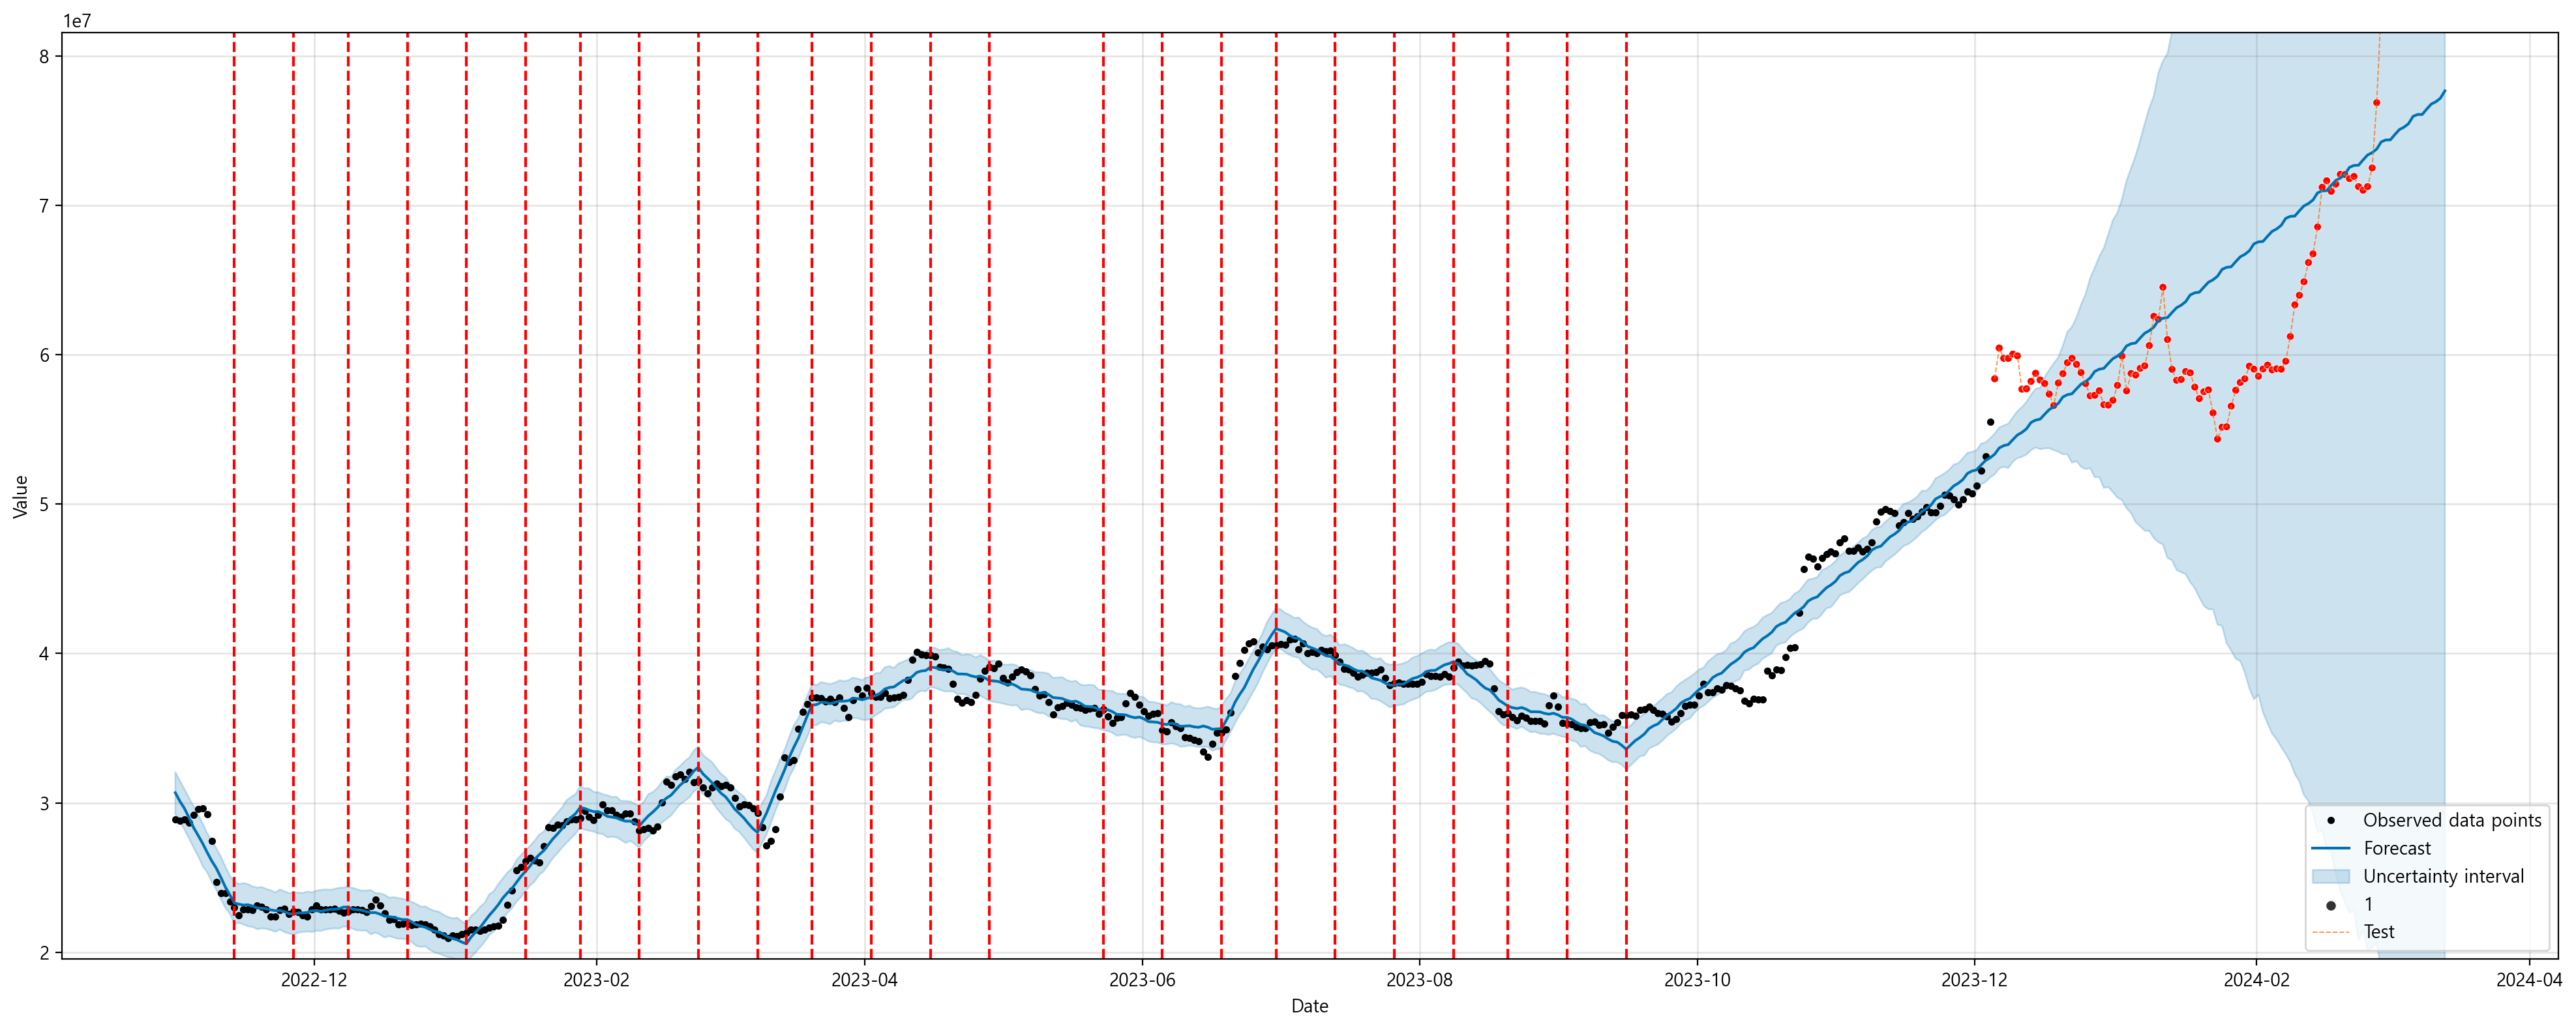

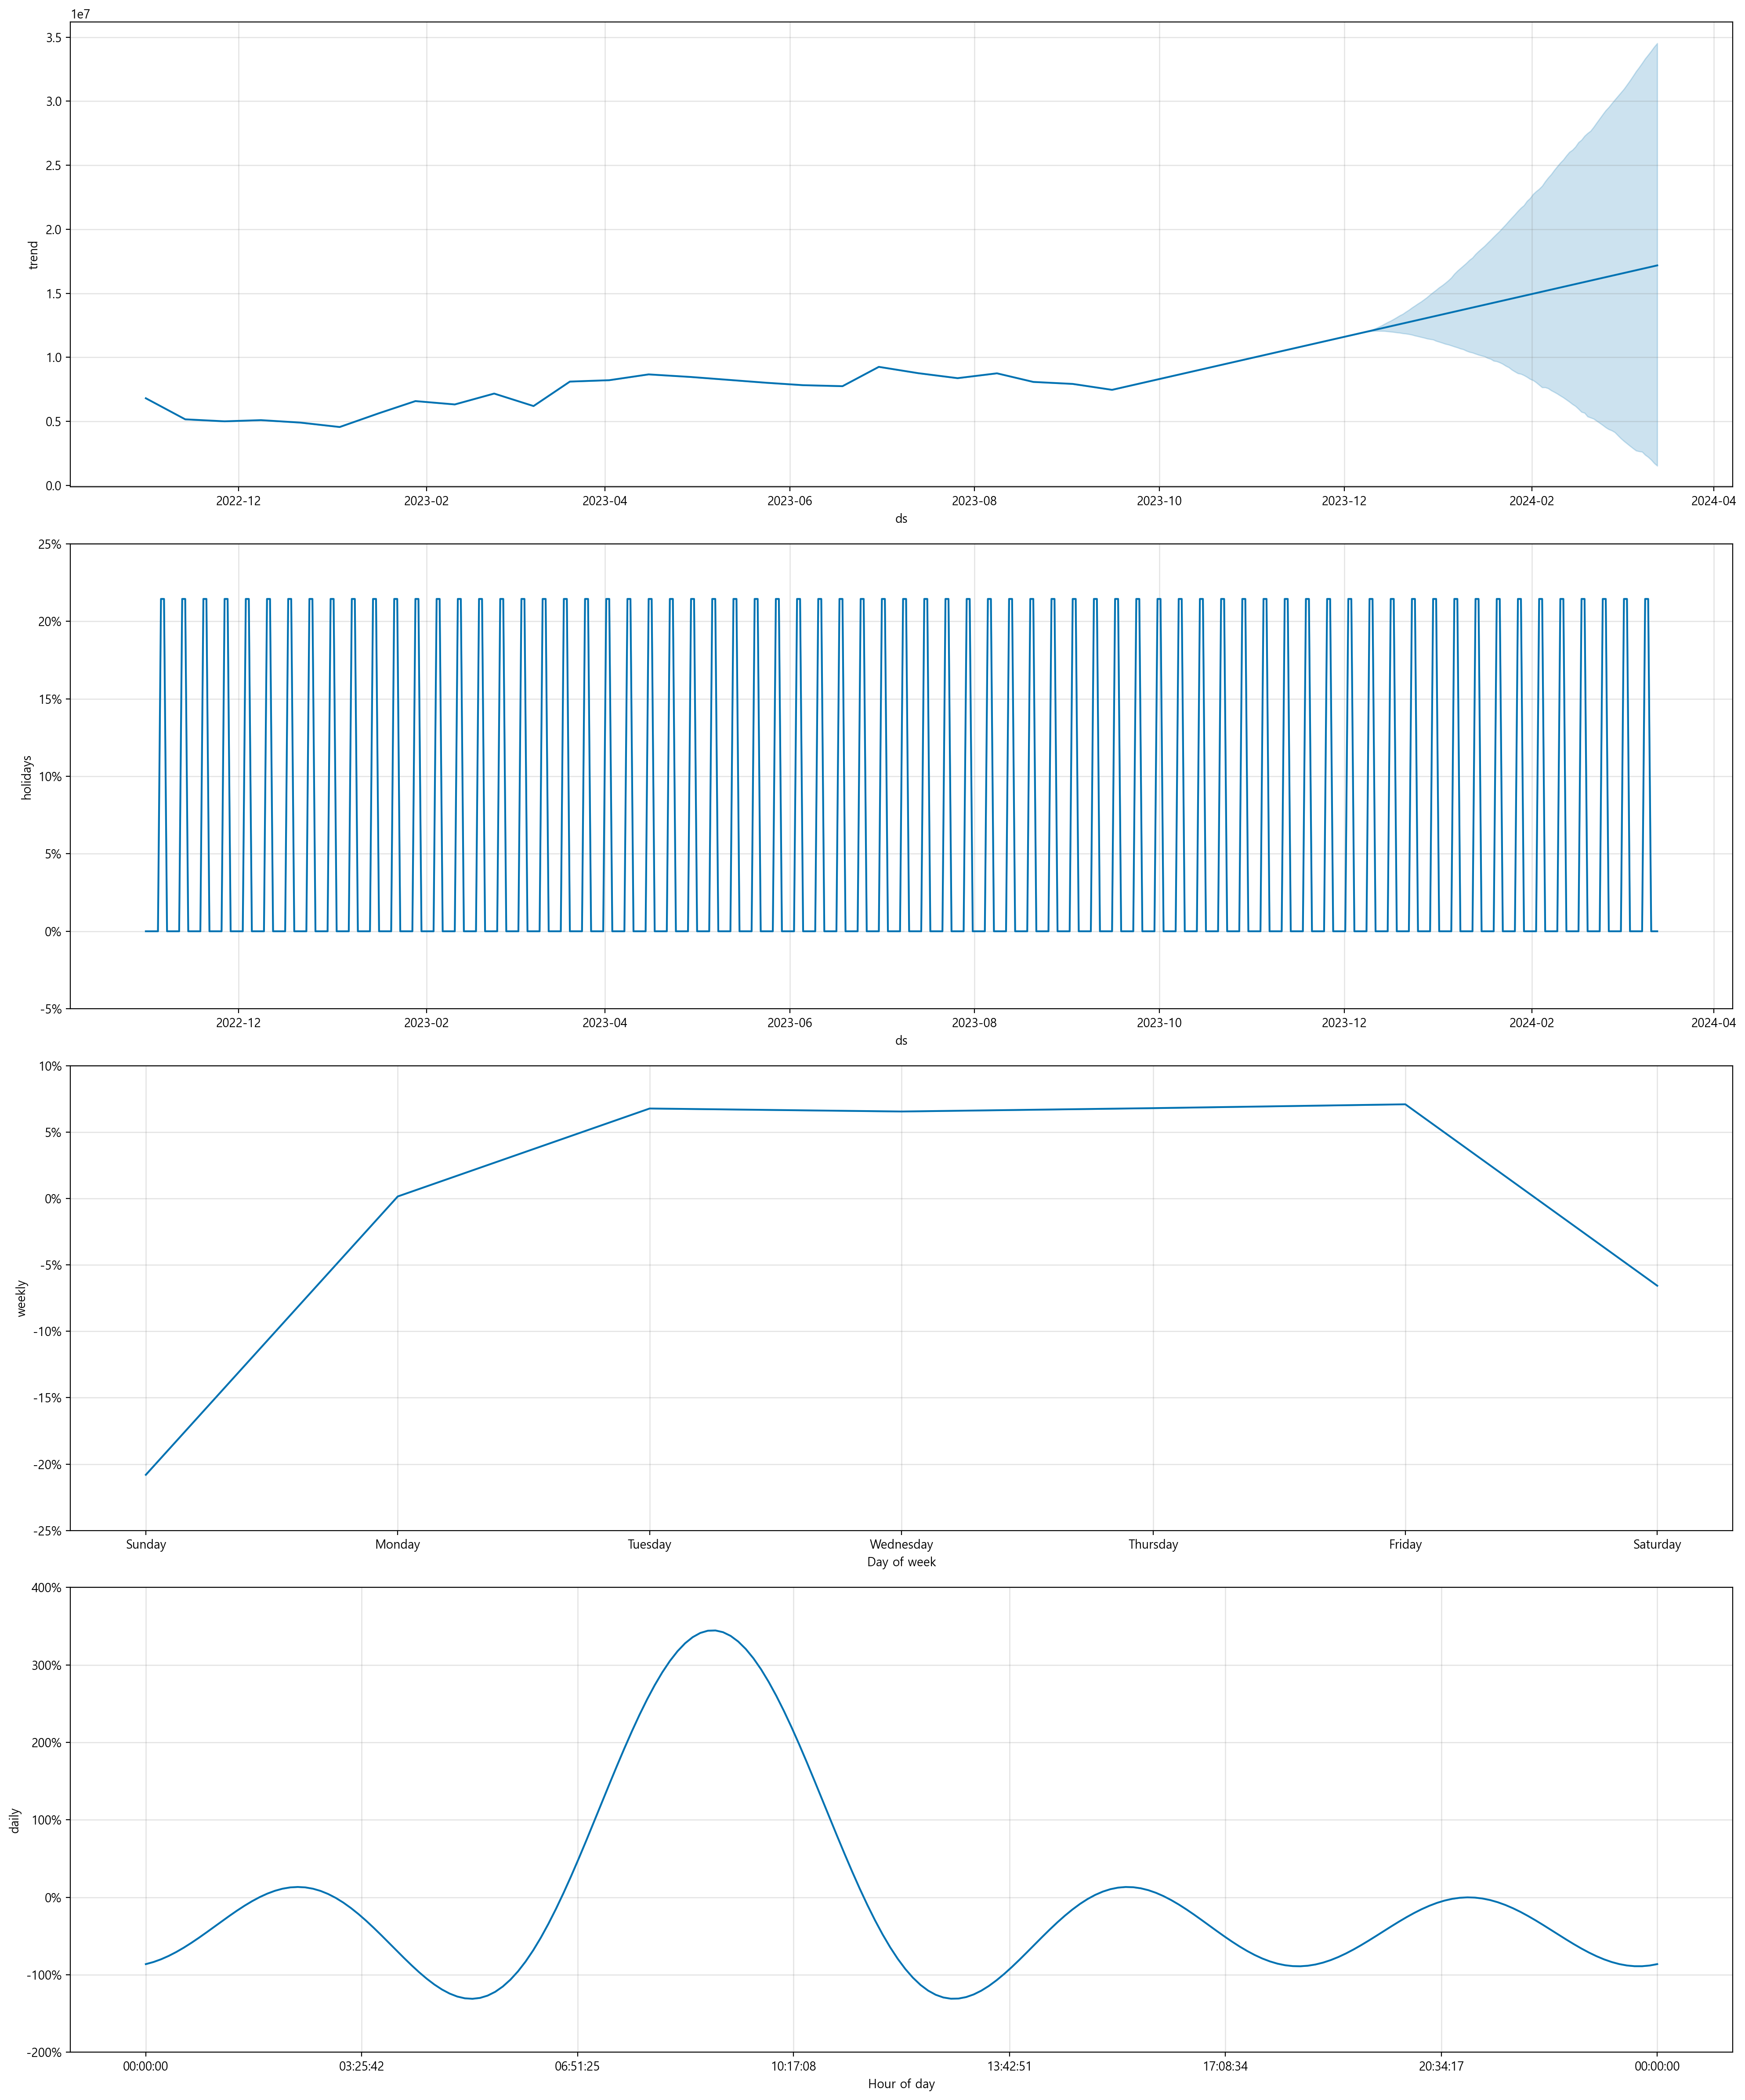

+-------------------+-------------+
|                   |     Prophet |
|-------------------+-------------|
| 평균절대오차(MAE) | 6.03224e+06 |
| 평균제곱오차(MSE) | 6.96555e+13 |
| 평균오차(RMSE)    | 8.34599e+06 |
+-------------------+-------------+


In [10]:
train, test = my_timeseries_split(df)
model, param, score, forecast, pred = my_prophet(train, test, freq="D", dpi=200, **params)